In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer

In [2]:
dfH = pd.read_csv('CBS_2021-2023_Hourly_Weather.csv')
dfH.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9


In [3]:
dfH.isnull().sum()

Casual                     11
Date                        0
Hour                        0
Member                     11
Total_rides                11
relativehumidity_2m (%)     0
temperature_2m (°C)         0
weathercode (wmo code)      0
windspeed_10m (km/h)        0
dtype: int64

In [ ]:
# Identify columns with null values
columns_with_nulls = dfH.columns[dfH.isnull().any()]

# Choose a strategy for handling null values using 'mean'
imputer = SimpleImputer(strategy='mean') 

# Fit and transform the imputer on the specified columns
dfH[columns_with_nulls] = imputer.fit_transform(dfH[columns_with_nulls])


In [5]:
dfH.isnull().sum()

Casual                     0
Date                       0
Hour                       0
Member                     0
Total_rides                0
relativehumidity_2m (%)    0
temperature_2m (°C)        0
weathercode (wmo code)     0
windspeed_10m (km/h)       0
dtype: int64

In [6]:
dfH = dfH.rename(columns={'weathercode (wmo code)':'weather',
                       'temperature_2m (°C)':'Temp',
                       'windspeed_10m (km/h)':'Windspeed',
                       'relativehumidity_2m (%)':'Humidity'})
dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9


In [7]:
# Convert the 'Date' column to datetime format
dfH['Date'] = pd.to_datetime(dfH['Date'])

# Extract Month and Year from the 'Date' column
dfH['Month'] = dfH['Date'].dt.month
dfH['Year'] = dfH['Date'].dt.year

dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Month,Year
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,1,2021
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,2021
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,1,2021
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,1,2021
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,1,2021


In [8]:
# Define a function to determine the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the get_season function to the 'Month' column and create a new 'Season' column
dfH['Season'] = dfH['Month'].apply(get_season)
dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Month,Year,Season
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,1,2021,Winter
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,2021,Winter
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,1,2021,Winter
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,1,2021,Winter
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,1,2021,Winter


In [14]:
# Define rush hour periods (you can customize these based on your data)
rush_hours = [(6, 10), (16, 20)]  # Morning and evening rush hours
def is_rush_hour(hour):
    for start, end in rush_hours:
      if start <= hour <= end:
        return 'Rush Hour'
    return 'Weak Hour'

# Apply the is_rush_hour function to the 'Hour' column and create a new 'Rush_Hour' column
dfH['Rush_Hour and Weak_hour'] = dfH['Hour'].apply(is_rush_hour)

In [15]:
dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Month,Year,Season,Rush_Hour and Weak_hour
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,1,2021,Winter,Weak Hour
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,2021,Winter,Weak Hour
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,1,2021,Winter,Weak Hour
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,1,2021,Winter,Weak Hour
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,1,2021,Winter,Weak Hour


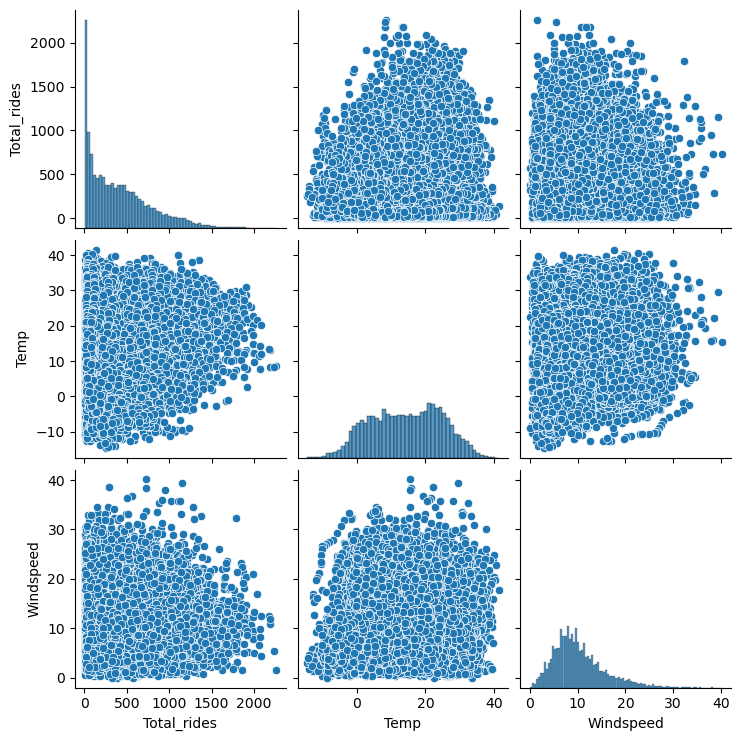

In [9]:
# Pair plot: Visualize relationships between multiple features
sns.pairplot(dfH[['Total_rides', 'Temp', 'Windspeed']])
plt.show()

[Text(0.5, 1.0, 'Count of bikes during different years')]

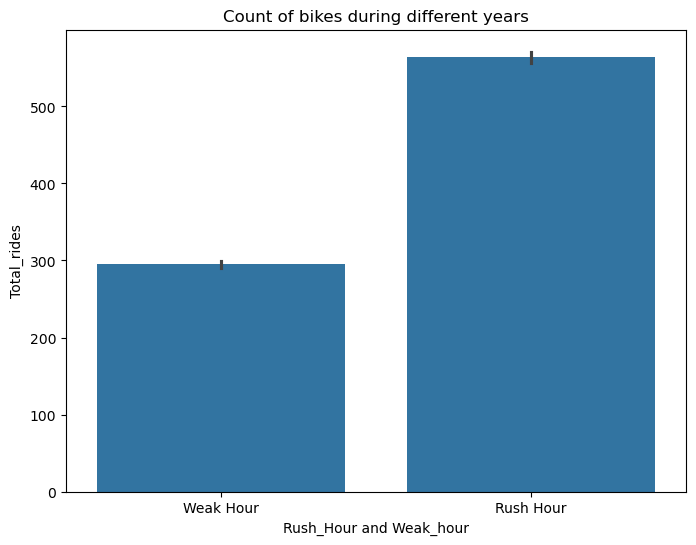

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=dfH, x='Rush_Hour and Weak_hour', y='Total_rides', ax=ax)
ax.set(title='Count of bikes during different years')

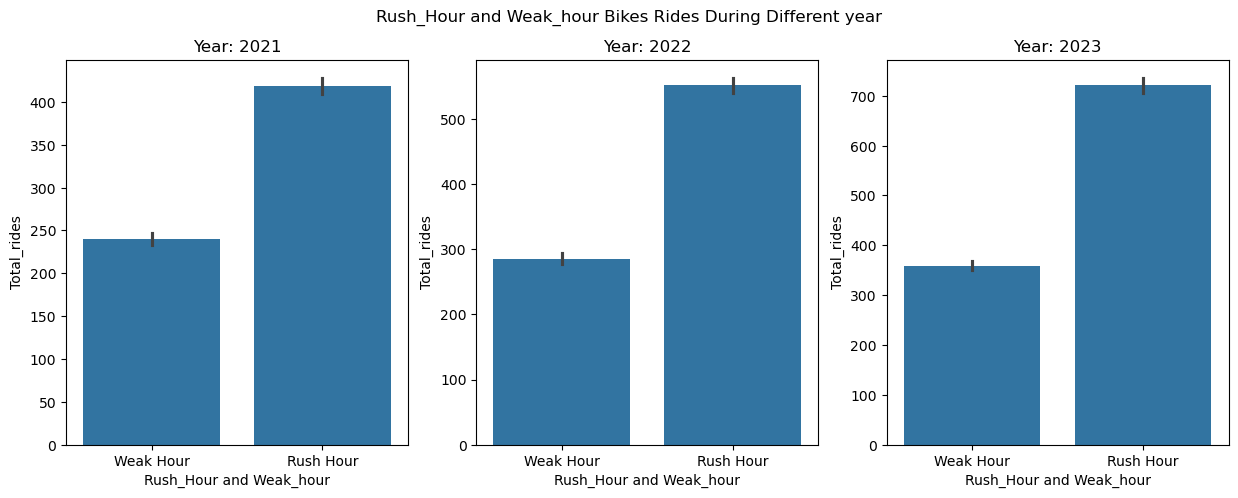

In [17]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Rush_Hour and Weak_hour Bikes Rides During Different year')

for i, year in enumerate(dfH['Year'].unique()):
    year_data = dfH[dfH['Year'] == year]
    sns.barplot(data=year_data, x='Rush_Hour and Weak_hour', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()

[Text(0.5, 1.0, 'Count of bikes during different years')]

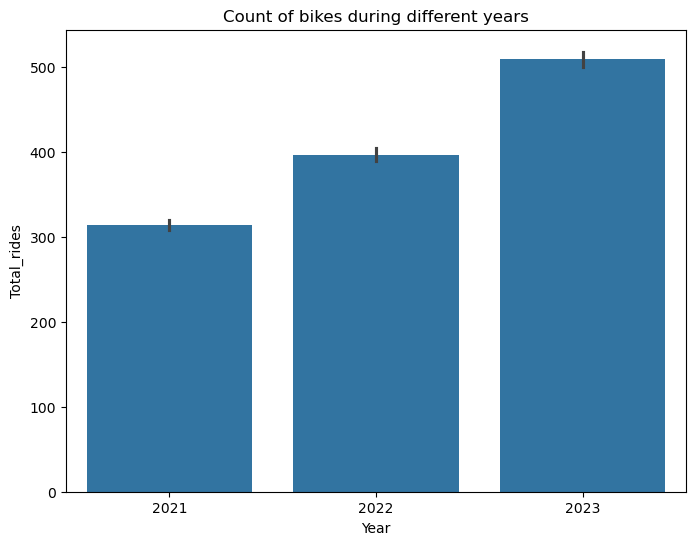

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=dfH, x='Year', y='Total_rides', ax=ax)
ax.set(title='Count of bikes during different years')

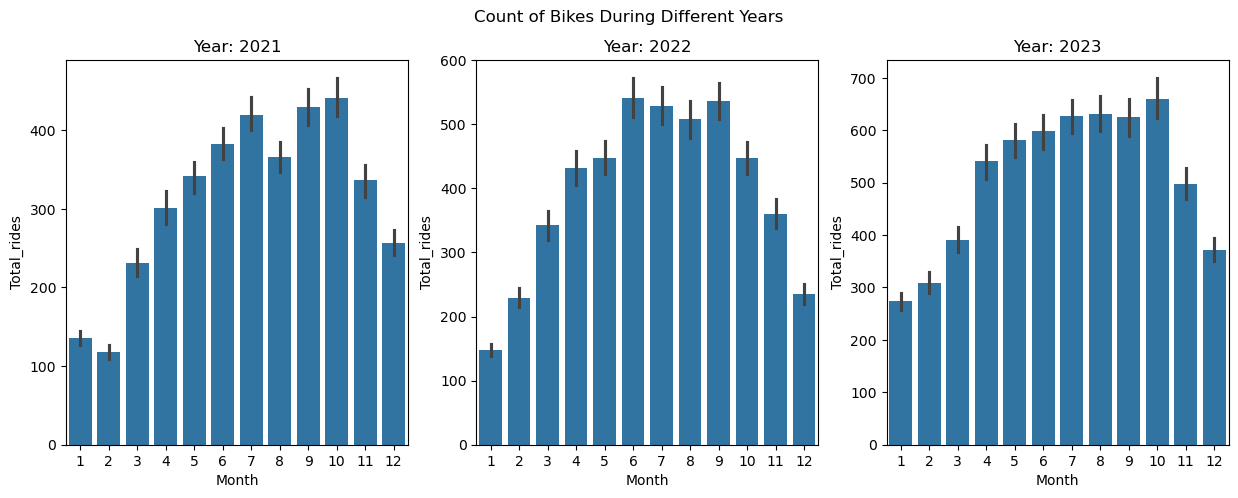

In [12]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Count of Bikes During Different Years')

for i, year in enumerate(dfH['Year'].unique()):
    year_data = dfH[dfH['Year'] == year]
    sns.barplot(data=year_data, x='Month', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()

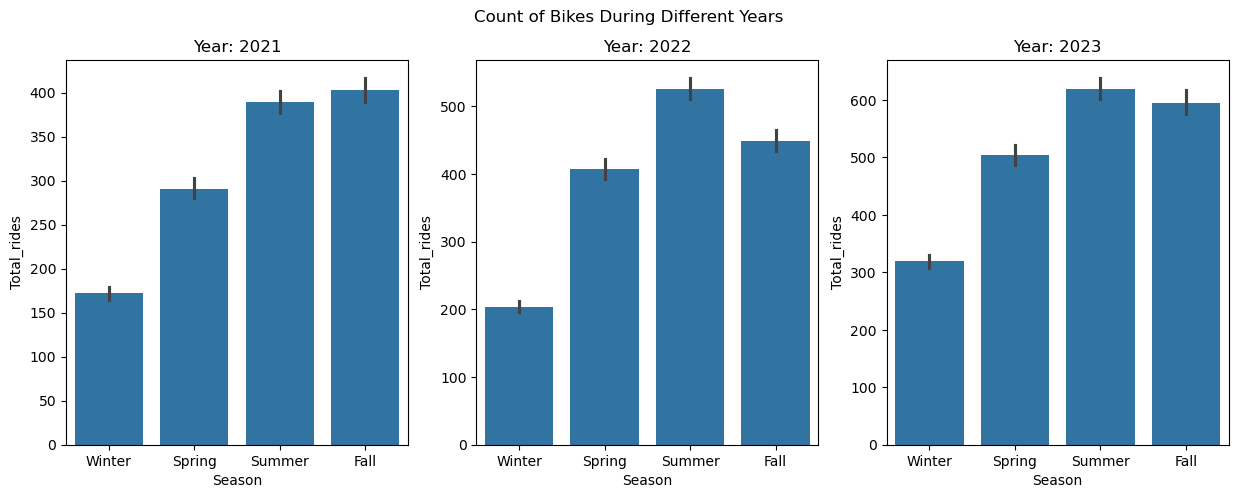

In [13]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Count of Bikes During Different Years')

for i, year in enumerate(dfH['Year'].unique()):
    year_data = dfH[dfH['Year'] == year]
    sns.barplot(data=year_data, x='Season', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()
